# 3주차 Day5 과제

## Mission1. Netflix and Code

In [3]:
import pandas as pd

netflix = pd.read_csv('./netflix_titles.csv')
korea_data = netflix[netflix['country'] == 'South Korea']

len(korea_data)

183

## Bonus Part

In [4]:
country_data = netflix.groupby(by=netflix['country'])
country_data = country_data.count()
max_country = country_data[country_data['show_id']==max(country_data['show_id'])]

max_country.show_id

country
United States    2555
Name: show_id, dtype: int64

## Mission2. 가즈아! + Bonus

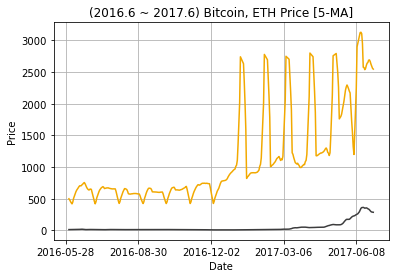

In [6]:
import matplotlib.pyplot as plt

bitcoin = pd.read_csv('BitCoin.csv')
bitcoin = bitcoin.sort_values(by=['Date'], axis=0)
bitcoin.index = bitcoin['Date']

bitcoin = bitcoin.loc['2016-05-28':'2017-06-30']
bitcoin['5avg'] = bitcoin['Open'].rolling(5).mean()

eth = pd.read_csv('ETH_day.csv')
eth = eth.sort_values(by=['Date'], axis=0)
eth.index = eth['Date']

eth = eth.loc['2016-05-28':'2017-06-30']
eth['5avg'] = eth['Open'].rolling(5).mean()

plt.plot(eth['5avg'], color='#3c3c3d')
plt.plot(bitcoin['5avg'], color='#f2a900')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('(2016.6 ~ 2017.6) Bitcoin, ETH Price [5-MA]')
plt.xticks(eth['Date'][::94])
plt.grid()
plt.show()